In [1]:
Names = "Jhade Mondragon & Luis Carillo"

"Model 3: Neural Networks"

'Model 3: Neural Networks'

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/FINAL PROJECT/Loan_default.csv') # use regular pd.read_csv('Loan_default.csv') if using personal computer or personal storage drive dataset location

numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']

numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]

normalized_numerical = normalize(numerical_data)

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(categorical_data)

processed_data = pd.DataFrame(normalized_numerical, columns=numerical_columns)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

final_data = pd.concat([processed_data, encoded_df], axis=1)

final_data['Default'] = data['Default']

X = final_data.drop('Default', axis=1)
y = final_data['Default']

X_norm = None

X_norm =  normalize(X, norm='max')

X_train, X_test, y_train, y_test, X_val, y_val = None, None, None, None, None, None


X_train, X_temp, y_train, y_temp = train_test_split(X_norm, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)


y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.long)

Mounted at /content/drive


In [3]:
class MultiLayerNet(nn.Module):

    def __init__(self,input_dim,output_dim):
        super(MultiLayerNet,self).__init__()

        self.fc1 = torch.nn.Linear(input_dim, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out = None

        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)

        return out


In [4]:
def train_network(model, optimizer, criterion, X_train, y_train, X_val, y_val, X_test, y_test, num_epochs, train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies):
    for epoch in range(1, num_epochs + 1):

        model.train()
        optimizer.zero_grad()

        outputs_train = model(X_train)
        train_loss = criterion(outputs_train, y_train)

        train_loss.backward()
        optimizer.step()

        train_accuracy = get_accuracy_multiclass(outputs_train, y_train)

        train_losses.append(train_loss.item())
        train_accuracies.append(train_accuracy)

        model.eval()
        with torch.no_grad():

            outputs_val = model(X_val)
            val_loss = criterion(outputs_val, y_val)
            val_accuracy = get_accuracy_multiclass(outputs_val, y_val)

            outputs_test = model(X_test)
            test_loss = criterion(outputs_test, y_test)
            test_accuracy = get_accuracy_multiclass(outputs_test, y_test)

            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)
            test_losses.append(test_loss.item())
            test_accuracies.append(test_accuracy)

        print(f"Epoch [{epoch}/{num_epochs}], "
              f"Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, "
              f"Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}%, "
              f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")


In [5]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.detach().numpy() # added detach()
    original_arr = original_arr.detach().numpy() # added detach()
    final_pred= []
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [6]:
learning_rate = 0.001
input_dim = X_train.shape[1]
output_dim = len(torch.unique(y_train))
num_epochs = 20

model_mln = MultiLayerNet(input_dim, output_dim)

optimizer = torch.optim.Adam(model_mln.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

train_network(model_mln, optimizer, criterion, X_train, y_train, X_val, y_val, X_test, y_test, num_epochs,
              train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies)

Epoch [1/20], Train Loss: 0.7496, Train Accuracy: 11.60%, Val Loss: 0.7389, Val Accuracy: 11.80%, Test Loss: 0.7394, Test Accuracy: 11.50%
Epoch [2/20], Train Loss: 0.7393, Train Accuracy: 11.60%, Val Loss: 0.7289, Val Accuracy: 11.86%, Test Loss: 0.7294, Test Accuracy: 11.53%
Epoch [3/20], Train Loss: 0.7293, Train Accuracy: 11.64%, Val Loss: 0.7192, Val Accuracy: 13.58%, Test Loss: 0.7196, Test Accuracy: 13.10%
Epoch [4/20], Train Loss: 0.7195, Train Accuracy: 13.25%, Val Loss: 0.7097, Val Accuracy: 20.14%, Test Loss: 0.7100, Test Accuracy: 19.43%
Epoch [5/20], Train Loss: 0.7099, Train Accuracy: 19.68%, Val Loss: 0.7002, Val Accuracy: 34.87%, Test Loss: 0.7004, Test Accuracy: 34.39%
Epoch [6/20], Train Loss: 0.7004, Train Accuracy: 34.64%, Val Loss: 0.6907, Val Accuracy: 54.96%, Test Loss: 0.6909, Test Accuracy: 54.61%
Epoch [7/20], Train Loss: 0.6909, Train Accuracy: 54.69%, Val Loss: 0.6812, Val Accuracy: 72.88%, Test Loss: 0.6813, Test Accuracy: 72.99%
Epoch [8/20], Train Loss: 0

In [7]:


with torch.no_grad():
    predictions_train = model_mln(X_train)
    predictions_test = model_mln(X_test)

predicted_train_classes = torch.argmax(predictions_train, dim=1).numpy()
predicted_test_classes = torch.argmax(predictions_test, dim=1).numpy()

true_train_labels = y_train.numpy()
true_test_labels = y_test.numpy()

train_report = classification_report(true_train_labels, predicted_train_classes)
test_report = classification_report(true_test_labels, predicted_test_classes)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

train_acc_mln = get_accuracy_multiclass(predictions_train, y_train)
test_acc_mln = get_accuracy_multiclass(predictions_test, y_test)

print(f"Train Accuracy: {train_acc_mln * 100:.2f}%")
print(f"Test Accuracy: {test_acc_mln * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    158013
           1       0.00      0.00      0.00     20729

    accuracy                           0.88    178742
   macro avg       0.44      0.50      0.47    178742
weighted avg       0.78      0.88      0.83    178742

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33900
           1       0.00      0.00      0.00      4403

    accuracy                           0.89     38303
   macro avg       0.44      0.50      0.47     38303
weighted avg       0.78      0.89      0.83     38303

Train Accuracy: 88.40%
Test Accuracy: 88.50%


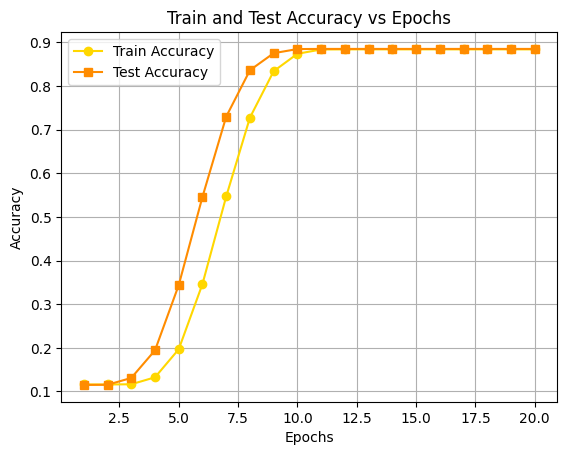

In [8]:
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy', color='gold', marker = 'o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='darkorange', marker = 's')

plt.title('Train and Test Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

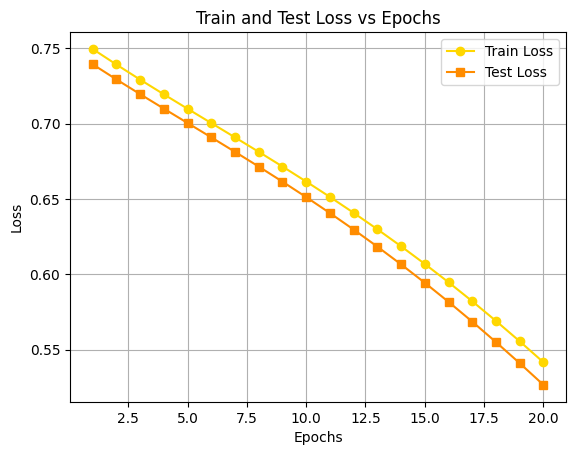

In [9]:
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, label='Train Loss', color='gold', marker = 'o')
plt.plot(epochs, test_losses, label='Test Loss', color='darkorange', marker = 's')

plt.title('Train and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
torch.save({
            'epoch': num_epochs,
            'model_state_dict': model_mln.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_losses[-1],
            }, '/content/drive/My Drive/FINAL PROJECT/final_mln.pt')